# The eigenfaces example: using PCA for classification

In [1]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\alire\scikit_learn_data


(400, 4096)

In [15]:
faces.images[0].shape

(64, 64)

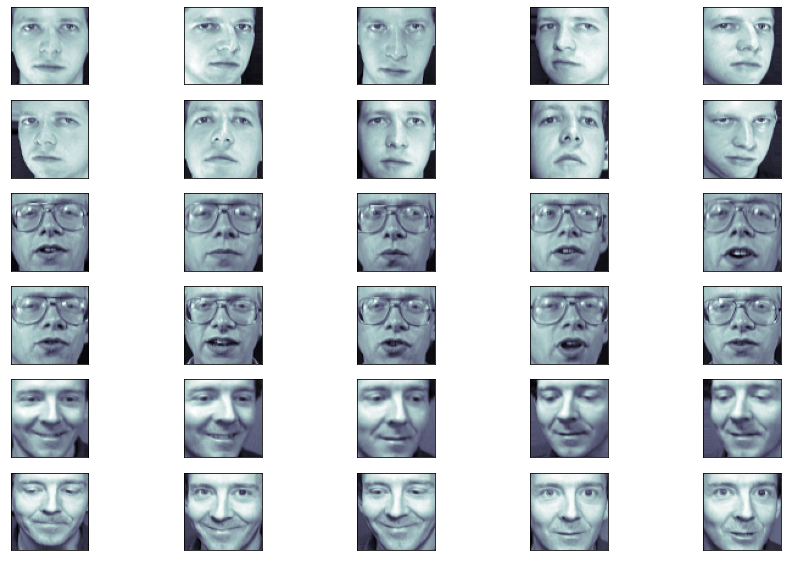

In [16]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 10))
# plot several images
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

### Splitting the data into training and test sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


### Fit the model on train set

In [9]:
from sklearn.decomposition import PCA

k = 150
pca = PCA(n_components=k, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

In [46]:
pca.explained_variance_ratio_

array([0.22858615, 0.14473355, 0.08096664, 0.04927516, 0.03675291,
       0.03238798, 0.02611597, 0.02096579, 0.02012989, 0.01675194,
       0.01608796, 0.01473585, 0.01297017, 0.01184333, 0.01086246,
       0.01009595, 0.00960638, 0.0086653 , 0.00791273, 0.00750067,
       0.00667507, 0.00648124, 0.00625629, 0.0058551 , 0.00551043,
       0.00533836, 0.00512329, 0.0048856 , 0.00451025, 0.00434211,
       0.00388769, 0.00377601, 0.00354086, 0.00347991, 0.00338479,
       0.00322585, 0.00318795, 0.00308651, 0.00303558, 0.00280051,
       0.0027571 , 0.00270062, 0.00254948, 0.00247673, 0.00244996,
       0.00242095, 0.00236208, 0.00231766, 0.00221618, 0.00218515,
       0.00210416, 0.00203572, 0.00194473, 0.00191943, 0.00187267,
       0.00181765, 0.0017944 , 0.00174802, 0.00171404, 0.0016786 ,
       0.00163656, 0.00161115, 0.00158339, 0.00156367, 0.00149204,
       0.00147901, 0.00145328, 0.00143828, 0.0014069 , 0.0013782 ,
       0.00136837, 0.00131622, 0.00130017, 0.00127521, 0.00122

### The mean face

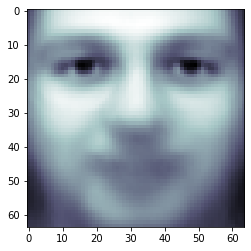

In [12]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone);

## Principal Components

In [13]:
print(pca.components_.shape)

(150, 4096)


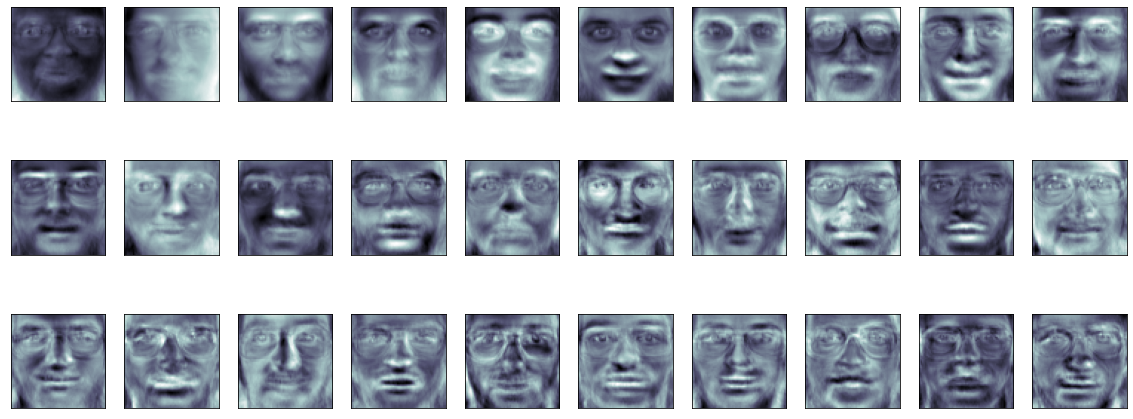

In [19]:
fig = plt.figure(figsize=(20, 8))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [21]:
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(300, 150) (100, 150)


# Fitting the SVM Model on Transformed Data

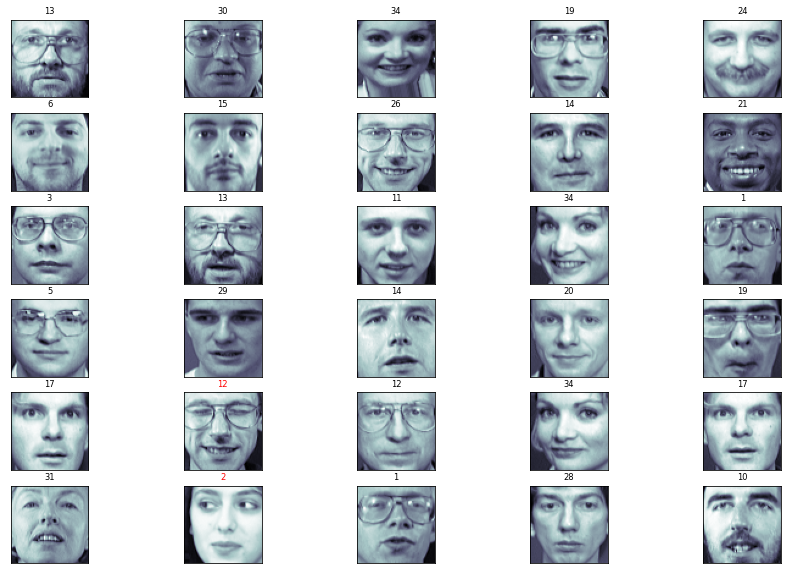

In [48]:
import numpy as np
from sklearn import svm

clf = svm.SVC(kernel = 'rbf', C=5, gamma=0.001)
clf.fit(X_train_new, y_train)

fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_new[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

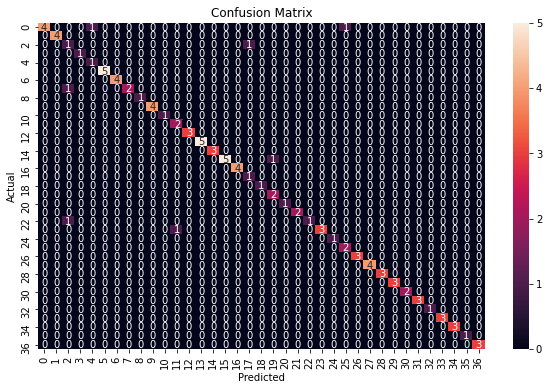

In [30]:
y_pred_test = clf.predict(X_test_new)

import seaborn as sb
from sklearn.metrics import confusion_matrix, classification_report

plt.subplots(figsize=(10, 6))
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      0.83      0.91         6
          19       1.00      1.00      1.00         4
          20       0.50    